# The Multi-Armed Bandit Problem: Two Simple Strategies

Zach Sperling

April 2nd, 2019

## Abstracts

### Short Abstract

We consider two methods to try to optimize the multi-armed bandit problem. We optimize each method by finding the values for a certain parameter that produce the largest reward and compare the results for each method. Graphs are provided to explain each iteration of each method.



### Medium Abstract

We use the provided code in Python that implements two strategies attempting to optimize the multi-armed bandit problem, a situation in which a gambler can bet on multiple machines with different fixed unknown probabilities for each machine. 

One method we consider is where we sometimes try a random machine and sometimes try what we currently believe is the best machine. Over time, the best machine may change, however, so trying random machines enough is important in our search for the best machine. 

Our other method we consider is where we try random machines for a certain amount of plays and then switch to exclusively trying what we believe our best machine to be. At this point, the best machine is often unchanging but can still change if our choice of best machine loses enough to drop below the second place machine. 

We then compare our results with an example for each strategy to try to discover if one of the methods is better than the other. The graphs that we create help guide us to discover how these two strategies differ.


## Introduction

In gambling, we often consider someone using a single machine. The machine has a fixed rate at which it outputs a success with a fixed prize and failure with no return otherwise. A person may use this machine until they run out of money or decide they have tried the machine enough times. This does not make for too interesting of a problem to consider since it is simply looking at fixed probabilities.

  In the multi-armed bandit problem, however, we consider a single gambler with the option of many machines rather than a single one. Each machine has its own chance of success; however, this is hidden from the gambler. If the gambler knew which machine has the highest chance of winning, the gambler would simply continue using this machine indiscriminately. Therefore, a strategy that the gambler could use is to make some attempts at trying new or random machines while also making attempts at what is currently believed to be the machine or top few machines with the highest chance of winning. This produces a much more complicated and interesting problem than a “single-armed bandit.”
    
We will attempt to develop a strategy in order to produce the greatest profit. We will make some attempts at exploring random machines, while storing a win ratio that is expressed as successful attempts divided by the total number of attempts. The win ratio for a given machine is shown in the equation below.

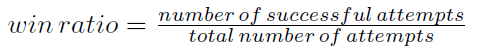

We will make other attempts at whichever machine we consider the most likely to be the best, the machine with the current highest win ratio. If we only made attempts at random machines, or exploring, we would never benefit from our gained knowledge; however, if we only made attempts at whichever machines we believe to be the best ones, or exploiting, we may miss out on a better machine that we have not even considered. Thus, a profitable balance of exploring and exploiting is the goal.


## Literature Review

In Anson Wong's "Solving the Multi-Armed Bandit Problem" (https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c), he attempts to solve the multi-armed bandit problem, including the full code of his method. I briefly considered his code as inspiration but ultimately decided that I would rather code my strategy in a different fashion. However, the graph provided did inspire my attempt in an important way, to the point of one of my own graphs in my paper looking much like his. Additionally, my first strategy of using a fixed explore parameter is also inspired by this paper. 

J. Langford et al's "The Epoch-Greedy Algorithm for Multi-armed Bandits with Side Information" (http://papers.nips.cc/paper/3178-the-epoch-greedy-algorithm-for-multi-armed-bandits-with-side-information) seems to follow largely with my strategy; however, they introduce a new parameter called regret; I do not use this parameter in my strategy. The same basic idea of choosing whether to explore or exploit is present in this paper, as well.

J. Vermorel et al's "Multi-armed Bandit Algorithms and Empirical Evaluation" (https://link.springer.com/content/pdf/10.1007%2F11564096_42.pdf) introduces a new method for approaching the multi-armed bandit problem while also commenting on already-established strategies. One such strategy is the "greedy" method, which is very close to my strategy in that an explore parameter is selected, giving a fixed chance of exploring vs exploiting the current best machine. This paper makes note of that this simple strategy is actually very effective, encouraging me to puruse my original, simple approach. 

Steven L. Scott's "A modern Bayesian look at the multi‐armed bandit" (https://onlinelibrary.wiley.com/doi/full/10.1002/asmb.874) reaffirms my trust in the "greedy" method as it describes a similar method: the method described is the same except that the explore parameter actually changes during the iterations rather than stays fixed; this is different than my first method, but my second method does have a changing explore parameter, albeit a binary one as opposed to a dynamic one as in this paper.

## Background

The multi-armed bandit problem is an extension of the single-armed bandit problem where, instead of a gambler playing a single slot machine n times, the gambler has a choice of m different machines that can be played n  times between the m machines. If the gambler wins on any machine, then a parameter is incremented, a parameter that we will call the "reward." For our purposes, we will call each play on a machine an "iteration." The total reward is tracked each time n iterations occur, which we call a "trial." In developing any strategy, it is necessary to perform many different trials while altering parameters to try to yield the highest reward. 

There are many different approaches that can be taken in order to try to maximize profits, involving various different calculations and parameters. Our approaches will not involve many different parameters. For our approaches, we will assume that the cost of gambling on each machine is a fixed number that is the same for each trial and is thus a constant that need not be mentioned. Additionally, we will have it that the gambler plays 1000 times overall on the machines for each trial.



## Our Strategies

We use Python to code the strategies and to output our graphs. The strategies employed in this discussion will be different in mostly a single regard. For both strategies, we will keep track of the win ratio for every machine, calculated by dividing the amount of wins of the machine by the amount of attempts taken at the machine. The following strategies will be referred to as the "Fixed Explore Parameter" strategy and the "Explore First, Exploit Later" strategy, respectively.

In the "Fixed Explore Parameter" strategy, we begin by selecting a percentage, necessarily between 0% and 100%, for the chance that we will choose a random machine without consideration of past win ratios: we will call this our "explore parameter." In this strategy, the explore parameter will remain fixed throughout the trial. We will also have a changing number that will also be between 0% and 100%, which we will call our "decider." Whenever the decided is less than our explore parameter, we will choose a random machine among all the machines and try to win at that machine. We will call this action of choosing a random machine and spending an iteration trying that machine "exploring" or "exploration." In the event that our decider is larger than the explore parameter, we will choose whichever machine has the current highest win ratio. We will call this machine our "favorite machine," and we will call this action of choosing the "favorite machine" "exploiting" or "exploitation." We will always begin by exploring, however, since we cannot possibly have a favorite machine without trying any of them yet (since they all have a ratio of zero when we begin).

Note that an explore parameter of 0% means that we will only choose our favorite machine for every single iteration after the first exploration, and an explore parameter of 100% means that we will always explore and never exploit. However, if we only choose our favorite machine without ever exploring, then we may have chosen a machine with a low win percentage and are exploiting a low-reward-yielding machine. Similarly, if we only explore every iteration, then we never use our gained knowledge of each machine's wins and losses to exploit the favorite machine; our strategy would not even care about win ratios and would only ever explore. Therefore, we will have an explore parameter larger than 0% and smaller than 100%.

In contrast, the "Explore First, Exploit Later" strategy has no explore parameter. Instead, we have a fixed number that we will call the "iterations to explore" parameter. This "iterations to explore" parameter will guide how many times we will explore without considering exploiting; by doing this, we build up our knowledge of the machines, and our favorite machine becomes more and more trustworthy. After we have explored the amount of times in the "iterations to explore" parameter, we will only exploit for the rest of the iterations. This is different from a 0% or 100% explore parameter version of the "Fixed Explore Parameter" strategy because we are not myopically picking a favorite machine to exploit without any attempts as in the case of having a 0% explore parameter nor are we never profiting from our exploration as in the case of having a 100% explore parameter. 

In both methods, we will keep every other parameter the same for some trials to compare results but also have randomization in order to test each strategy on its own merit.

## Experiment Results

### The "Fixed Explore Parameter" Strategy
For our first experiment, we test the "Fixed Explore Parameter" strategy for every explore parameter from 0% to 100% in increments of 5% over 500 trials with 1000 iterations in each trial. Worth noting is that machine 0 had a true winrate of 30%, machine 1 had a true winrate of 70%, machine 2 had a true winrate of 20%, machine 3 had a true winrate of 80%, and machine 4 had a true winrate of 60%. The graph below displays the results. The explore parameter that yielded the largest reward was 5% with an average of 750.908 reward. However, the explore parameter of 10% yielded an average reward of 748.466. One may wonder if 5% is actually a better explore parameter than 10% when the numbers are less than 3 reward apart. Regardless, the graph is roughly a hill shape with a peak around 5%, so we can safely conclude that around 5% is the optimal explore parameter for this situation. Later, we will compare this reward with the highest reward we can yield from the "First Explore, Then Exploit" method.

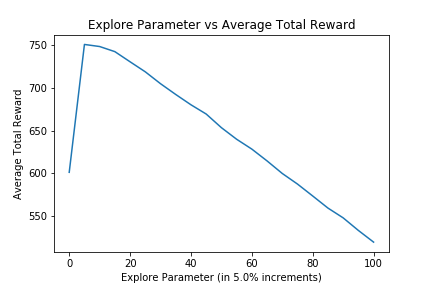


Now that we have established a theoretical best value for our explore parameter, we will see how the favorite machine changes over 1000 iterations, averaging over 100 trials the percentages that a particular machine was the current favorite machine. We can see that in fewer than 100 iterations, the machine that was the favorite machine the most percentage of the time was on average the actual highest reward-yielding machine, namely machine 3, with an 80% chance of winning. As the iterations increase, the percentage at which machine 3 is selected on average as the favorite machine increases, as well, even reaching past 80% near the end of the 1000 iterations. In fact, the same can be said for the second highest-yieled machine, machine 1, with a 70% chance of winning. One may wonder why machine 3 is so much more likely to be picked than machine 1 despite their percentages only differing by 10 percentage points. However, with our strategy, the current favorite machine always has the highest chance of being picked (whether from exploitation or randomly through exploring), so as soon as a "head start" is established for the actual highest-yielding machine, that one is much more likely to continue being picked even if another machine is close in actual win percentage, since that second machine is not being chosen as often.

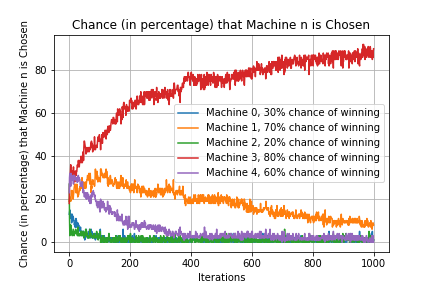


### The "First Explore, Then Exploit" Strategy
We will now consider our second method, the "First Explore, Then Exploit" strategy. We will look at exploring from iteration 1 to every 10 iterations from 10 to 1000, giving us 100 possibilites we will consider. We will have 100 trials with 1000 iterations in each trial for each of these possibilities. We can see from the graph below that having 590 be the number of explore iterations seems to produce the highest reward, with about 645 reward. However, this graph is notably different from the reward graph in the "Fixed Explore Parameter" strategy in that there seems to be no clear hill; instead, the reward jumps from one possibility to the next on the graph. Thus, this strategy seems to be less clear on its results. In fact, we notice that the highest reward yield in this strategy was about 645, which is less than the roughly 750 reward yield in the "Fixed Explore Parameter" strategy.

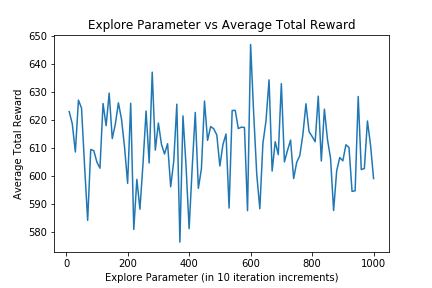


As before for the "Fixed Explore Parameter" strategy, we now consider for the "First Explore, Then Exploit" strategy the graph of what the average percentage of each machine being the favorite machine at every iteration. This graph also differs largely from that of the "Fixed Explore Parameter" strategy. This time, before the 590th iteration, there is no discernable order. This is because we are exclusively exploring, choosing a random machine each time. However, once we have done our 591st iteration, we then switch to exclusively exploiting. There seems to be some disagreement between the first and the second actual best machines this time. This is because, as a machine is being exploited, its win ratio can go down if it loses enough. From this, the current favorite machine and the second favorite machine could switch places. However, notice that it ends up leveling off to the actual best machine eventually. This is because the machines will approach their true win ratio; thus, the machine with the higher true win ratio will eventually be the favorite machine.

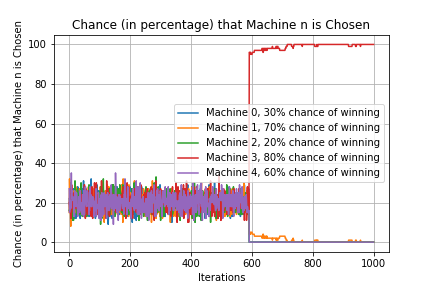

## Conclusions

We have now compared both strategies. We have seen in the specified experiments that the "Fixed Explore Parameter" strategy yieled a higher reward than the "First Explore, Then Exploit" strategy. However, it is unclear if the "First Explore, Then Exploit" strategy is worthwhile if there is another, similar strategy that seems to work better.

For the "Fixed Explore Parameter" strategy, it seems like an explore parameter of about 5% or 10% was the optimal value. Why is this? Perhaps more research is needed to determine the answer. Also unclear is why, for the "First Explore, Then Exploit" strategy, the optimal iteration to change from explore to exploit seemed to not be as confident.

Whether we have explored this in depth enough or not is for the reader to decide. We encourage the reader to review the code provided and run experiments to see if their data matches with the conclusions drawn here. 

## Limitations, Assumptions, and Room for Further Exploration

In the multi-armed bandit problem, we consider m machines. In our code and experiments, we always had m=5 and 1000 iterations. While this allowed for our results to have fewer factors, one may wonder if our methods would work for a larger (or even a smaller) m. One may also wonder if perhaps the better of our two methods will change depending on m, perhaps with a particular m value where a switch happens. Additionally, we kept the same values for each machine's true win ratio throughout all experiments to help with comparing the two strategies. We also did not factor in the cost of playing the machines nor the possibility of different machines yielding different amounts of reward. These could be changed to further test the two methods. All of these are possible avenues for further research.

Another possible extended study idea is to have a similar strategy to the "Fixed Explore Parameter" strategy but have a changing explore parameter, perhaps in a way reactionary to our current favorite machine's win rate. 

## Bibliography

Solving the Multi-Armed Bandit Problem
Anson Wong
Towards Data Science
Sep 24, 2017
https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c


A modern Bayesian look at the multi‐armed bandit
Applied Stochastic Models in Business and Industry
Steven L. Scott
16 December 2010
Volume 26, Issue 6
November/December 2010
Pages 639-658
https://onlinelibrary.wiley.com/doi/full/10.1002/asmb.874


Vermorel J., Mohri M. (2005) Multi-armed Bandit Algorithms and Empirical Evaluation. In: Gama J., Camacho R., Brazdil P.B., Jorge A.M., Torgo L. (eds) Machine Learning: ECML 2005. ECML 2005. Lecture Notes in Computer Science, vol 3720. Springer, Berlin, Heidelberg
https://link.springer.com/content/pdf/10.1007%2F11564096_42.pdf


The Epoch-Greedy Algorithm for Multi-armed Bandits with Side Information
John Langford, Tong Zhang
2007
Advances in Neural Information Processing Systems 20 (NIPS 2007)
http://papers.nips.cc/paper/3178-the-epoch-greedy-algorithm-for-multi-armed-bandits-with-side-information


https://en.wikipedia.org/wiki/Multi-armed_bandit (for basic understanding)
Multi-armed bandit


https://stackoverflow.com/questions/18449360/access-item-in-a-list-of-lists
https://stackoverflow.com/questions/19125722/adding-a-legend-to-pyplot-in-matplotlib-in-the-most-simple-manner-possible

Code for the very basic structure of the graphs was provided by the following:
https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html





## Appendix:
    Other Possible Titles:
        How Can a Gambler Make the Largest Profit During the Multi-Armed Bandit Problem?
        Two Proposed Methods for Optimizing the Multi-Armed Bandit Problem
        Multi-Armed Bandit: Friend or Foe?
        
### Source Code:


[599.822, 752.152, 749.436, 739.338, 728.634, 719.312, 706.976, 693.874, 680.146, 668.358, 654.4, 640.912, 627.126, 613.794, 601.79, 587.412, 573.632, 559.108, 546.34, 533.238, 520.072]
The best explore parameter we tried was 0.05


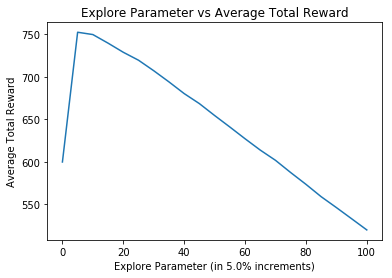

In [2]:
# CODE FOR DETERMINING THE BEST EXPLORE PARAMETER FOR THE "FIXED EXPLORE PARAMETER" STRATEGY



#BEGIN DEFINING VARIABLES
# # #
# #
#

import random; #Stochastic
import math;   #Math
               #Modeling!

    
    
#SETTING UP EXPLORE PARAMETER
   
steppar=0.05
rangepar=int(1/steppar)
expparavg=list() #making a list to keep track of the average wallet for each explore parameter

for p in range(rangepar+1):               #from 0   to  10
	explore_parameter=steppar*p   #from 0.00 to 1.00 
	expparavg.append(0)           # $0 for now
    
	#SETTING UP TRIALS    
	numtrial=500   #how many trials

	trial=list() #keeping track of amount of attempts so we can have a current favorite machine
	for i in range(numtrial):   #from 0 to numtrial-1
		trial.append(0)
    
	#BEGINNING OF A TRIAL   
	for j in range(numtrial):  
		M=5                #number of machines
		explore_chance=explore_parameter #explore_parameter chance of exploring
		iterations=1000    #we will have 1000 tries at machines
		expchoice=2        #choosing whether to exploit or explore. Starting at 2, which is not a valid option, so we are sure that either 0 or 1 is actually selected
		machchoice=-1      #choosing which machine to try during exploring. Starting at -1 since there is no mach -1
		favmach=-1         #current favorite machine. Starting at -1 since there is no machine -1.
		wallet=0           #how much money we have made so far
		h=0                #we will start by exploring since we currently have no favorite machine

		mach_chance=list()
		mach_chance.append(0.3) #30% chance of winning if we try machine 0
		mach_chance.append(0.7) #70% chance of winning if we try machine 1
		mach_chance.append(0.2)
		mach_chance.append(0.8)
		mach_chance.append(0.6) #define M machines (M=5 here and this machine is machine M-1)

		mach_pastwins=list() #keeping track of the number of wins for each machine
		for i in range(M):   #from 0 to M-1
			mach_pastwins.append(0)

		mach_attempts=list() #keeping track of amount of attempts so we can have a current favorite machine
		for i in range(M):   #from 0 to M-1
			mach_attempts.append(0)

		mach_winrate=list() #keeping track of our current winrate
		for i in range(M):  #from 0 to M-1
			mach_winrate.append(0)

#
# # 
# # #
# END DEFINING VARIABLES





		#The iterations of a single trial
		while iterations>0:

    #CHOOSING BETWEEN EXPLORING OR EXPLOITING
			if h<explore_chance: #h<explore_chance. h will statistically never actually equal h.
				h2=random.random(); #we must use another value here. Using our previous h's value will make certain machines unable to be chosen
				machchoice=math.floor(M*h2) #using floor so it goes from 0 to M-1
			else: #h>explore_chance: 
				machchoice=favmach   #simply using our favmach
        

    #PUTTING THE MONEY IN MACHINE MACHCHOICE
				#we have decided to try machchoice
			attempt=random.random() #our shot at winning
            
			if attempt<mach_chance[machchoice]:
				wallet=wallet+1 # adding $1 to our wallet for winning
				mach_pastwins[machchoice]=mach_pastwins[machchoice] + 1 #adding 1 to our past wins of mach machchoice, the current 
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine
			else:
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine
      
			mach_winrate[machchoice]=mach_pastwins[machchoice]/mach_attempts[machchoice] #updating our winrate for mach machchoice 

    

			#UPDATING FAVMACH
			for N in range(M): #goes from 0 to M-1,
				if mach_winrate[N] > mach_winrate[favmach]:
					favmach=N

    
    #SETTING UP FOR NEXT ITERATION
			random.seed() #not sure if I need this for every loop or not, probably not
			for i in range(M): #we want to keep exploring until we win at least once, so that we will have a favorite machine
				if mach_pastwins[i]==0: #if this machine has not won, keep h=0
					h=0
				else: #if we do indeed have a machine with a nonzero winrate, we can have a chance at exploring
					h=random.random() #making h a random number in (0,1) 
					break             #must include break once we have a nonzero pastwins

			iterations=iterations-1 #another iteration complete

		#We have finished all iterations of this trial        
		trial[j]=wallet #this is our amount made from trial j


	trialstotal=0
	for k in range(len(trial)):
		trialstotal=trialstotal+trial[k] #calculating sum of the wallets for this particular explore_parameter
	expparavg[p]=trialstotal/len(trial)        #outputting average wallet for this particular explore_parameter

    
#now outside of any loop. We will now compare all the averages and give back only the best
favavg=0
for N in range(rangepar): #goes from 0 to M-1,
	if expparavg[N] > expparavg[favavg]:
		favavg=N
print(expparavg)
print("The best explore parameter we tried was " + str(steppar*favavg)) #keep in mind favavg is just the integer, 0 through 1/steppar, of the element's number


#The following code was copied from https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html 
#and then modified for our purposes
import numpy as np
import matplotlib.pyplot as plt

gx = np.arange(0.0, (1+steppar)*100, steppar*100) #np.arange(0.0, (steppar)*(1100), steppar*100)
gy = expparavg

fig, ax = plt.subplots()
ax.plot(gx, gy)

ax.set(xlabel='Explore Parameter (in '+str(steppar*100)+'% increments)', ylabel='Average Total Reward',
       title='Explore Parameter vs Average Total Reward')

fig.savefig("exploreparametergraph.png")

plt.show()

Test: 78
Test: 78.0


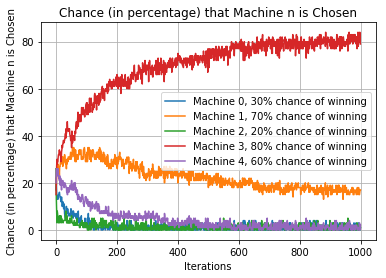

In [3]:
#CODE FOR COMPARING AVERAGE FAVORITE MACHINE DURING THE "FIXED EXPLORE PARAMETER" STRATEGY



#BEGIN DEFINING VARIABLES
# # #
# #
#

import random; #Stochastic
import math;   #Math
               #Modeling!

    
    
#SETTING UP EXPLORE PARAMETER

random.seed()
expparavg=0.05 #focusing on our best exppar #list() #making a list to keep track of the average wallet for each explore parameter
numtrial=100   #how many trials per explore parameter
M=5 #number of machines
iterations=1000    #we will have 1000 tries at machines

mach_chance=list()        
            
machchose=list()


for p in range(M): #numtrial+1): #setting up so we can keep track of how often a mach is chosen on trial n 
	machchose.append(list()) 
	for n in range(iterations):  
		machchose[p].append(0)   
else:
	#meant to break this loop    
    
 
    
    
#for p in range(rangepar+1):               #from 0   to  10
	explore_parameter=expparavg #steppar*p   #from 0.00 to 1.00 
    
    
	#SETTING UP TRIALS    
	trial=list() #keeping track of amount of attempts so we can have a current favorite machine
	for i in range(numtrial):   #from 0 to numtrial-1
		trial.append(0)
            
            
            
	#BEGINNING OF A TRIAL   
	for j in range(numtrial):  
		explore_chance=explore_parameter #explore_parameter chance of exploring
		iterationsleft=iterations    #we want to keep track of how many iterations left    
		expchoice=2        #choosing whether to exploit or explore. Starting at 2, which is not a valid option, so we are sure that either 0 or 1 is actually selected
		machchoice=-1      #choosing which machine to try during exploring. Starting at -1 since there is no mach -1
		favmach=-1         #current favorite machine. Starting at -1 since there is no machine -1.
		wallet=0           #how much money we have made so far
		h=0                #we will start by exploring since we currently have no favorite machine
          

		mach_chance.append(0.3) #30% chance of winning if we try machine 0
		mach_chance.append(0.7) #70% chance of winning if we try machine 1
		mach_chance.append(0.2)
		mach_chance.append(0.8)
		mach_chance.append(0.6) #define M machines (M=5 here and this machine is machine M-1)

		mach_pastwins=list() #keeping track of the number of wins for each machine
		for i in range(M):   #from 0 to M-1
			mach_pastwins.append(0)

		mach_attempts=list() #keeping track of amount of attempts so we can have a current favorite machine
		for i in range(M):   #from 0 to M-1
			mach_attempts.append(0)

		mach_winrate=list() #keeping track of our current winrate
		for i in range(M):  #from 0 to M-1
			mach_winrate.append(0)

#
# # 
# # #
# END DEFINING VARIABLES





		#The iterations of a single trial
		while iterationsleft>0:

    #CHOOSING BETWEEN EXPLORING OR EXPLOITING
			if h<explore_chance: #h<explore_chance. h will statistically never actually equal h.
				h2=random.random(); #we must use another value here. Using our previous h's value will make certain machines unable to be chosen
				machchoice=math.floor(M*h2) #using floor so it goes from 0 to M-1
			else: #h>explore_chance:  
				machchoice=favmach   #simply using our favmach
    
			machchose[machchoice][iterations-iterationsleft]=machchose[machchoice][iterations-iterationsleft]+1 
                
                
    #PUTTING THE MONEY IN MACHINE MACHCHOICE
				#we have decided to try machchoice
			attempt=random.random() #our shot at winning
            
			if attempt<mach_chance[machchoice]:
				wallet=wallet+1 # adding $1 to our wallet for winning
				mach_pastwins[machchoice]=mach_pastwins[machchoice] + 1 #adding 1 to our past wins of mach machchoice, the current 
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine
			else:
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine       
			mach_winrate[machchoice]=mach_pastwins[machchoice]/mach_attempts[machchoice] #updating our winrate for mach machchoice 


			#UPDATING FAVMACH
			for N in range(M): #goes from 0 to M-1,
				if mach_winrate[N] > mach_winrate[favmach]:
					favmach=N

    
    #SETTING UP FOR NEXT ITERATION
			random.seed() #not sure if I need this for every loop or not, probably not
			for i in range(M): #we want to keep exploring until we win at least once, so that we will have a favorite machine
				if mach_pastwins[i]==0: #if this machine has not won, keep h=0
					h=0
				else: #if we do indeed have a machine with a nonzero winrate, we can have a chance at exploring
					h=random.random() #making h a random number in (0,1) 
					break             #must include break once we have a nonzero pastwins

			iterationsleft=iterationsleft-1 #another iteration complete

		#We have finished all iterations of this trial        
		trial[j]=wallet #this is our amount made from trial j



print("Test: " + str(machchose[3][900]))

machchoseavg=list() #making the avg of each trial for each machine then graphing!

for p in range(M): #
	machchoseavg.append(list()) 
	for n in range(iterations):  
		machchoseavg[p].append((machchose[p][n]/numtrial)*100)
else:
	#meant to break this loop  
	print("Test: " + str(machchoseavg[3][900]))

    
    
#The following code was copied from https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html 
#and then modified for our purposes    
    
import numpy as np
import matplotlib.pyplot as plt

m0x = np.arange(0, iterations, 1)
m0y = machchoseavg[0]

m1x = np.arange(0, iterations, 1)
m1y = machchoseavg[1]

m2x = np.arange(0, iterations, 1)
m2y = machchoseavg[2]

m3x = np.arange(0, iterations, 1)
m3y = machchoseavg[3]

m4x = np.arange(0, iterations, 1)
m4y = machchoseavg[4]


fig, ax = plt.subplots()
ax.plot(m0x, m0y, label='Machine 0, 30% chance of winning')
ax.plot(m1x, m1y, label='Machine 1, 70% chance of winning')
ax.plot(m2x, m2y, label='Machine 2, 20% chance of winning')
ax.plot(m3x, m3y, label='Machine 3, 80% chance of winning')
ax.plot(m4x, m4y, label='Machine 4, 60% chance of winning')

ax.set(xlabel='Iterations', ylabel='Chance (in percentage) that Machine n is Chosen',
       title='Chance (in percentage) that Machine n is Chosen')
ax.grid()
ax.legend(loc='center right')
fig.savefig("favoritemachinegraph.png")
plt.show()

[610.682, 604.639, 616.736, 615.453, 612.272, 612.281, 610.495, 612.743, 616.277, 615.511, 601.665, 612.798, 617.703, 607.363, 609.09, 611.863, 607.477, 615.104, 614.16, 614.168, 617.599, 608.474, 621.685, 613.248, 611.811, 615.698, 612.357, 615.291, 607.687, 602.455, 610.09, 601.854, 612.486, 610.159, 612.518, 616.219, 605.493, 609.099, 605.009, 613.525]
The best explore parameter we tried was 550, with reward 621.685


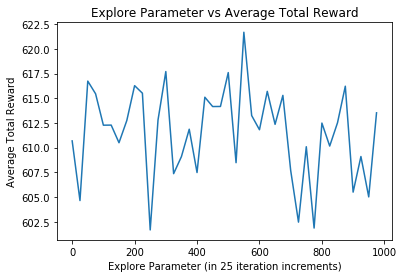

In [21]:
#CODE FOR DETERMINING OPTIMAL ITERATION TO SWITCH FROM EXPLORING TO EXPLOITING FOR THE "FIRST EXPLORE, THEN EXPLOIT" STRATEGY



#BEGIN DEFINING VARIABLES
# # #
# #
#

import random; #Stochastic
import math;   #Math
               #Modeling!

    
    
#SETTING UP EXPLORE PARAMETER
#explore_parameter=list() #here is our list of explore parameters    
steppar=25
expiter=list()
rangepar=int(1000/steppar)
expparavg=list() #making a list to keep track of the average wallet for each explore parameter

for p in range(100):            #from 0   to  100
	expiter.append(10*(p+1))           # Putting p+1 into the pth slot (for instance, 1 in the 0th spot and 100 in the 99th spot)

for p in range(rangepar):       #from 0   to  100
	expparavg.append(0)           # $0 for now
    
	#SETTING UP TRIALS    
	numtrial=1000   #how many trials

	trial=list() #keeping track of amount of attempts so we can have a current favorite machine
	for i in range(numtrial):   #from 0 to numtrial-1
		trial.append(0)
    
	#BEGINNING OF A TRIAL   
	for j in range(numtrial):  
		M=5                #number of machines
		explore_chance=0.5 #this value does not really matter. h=0 will be for exploring and h=1 will be for exploiting
		fixediterations=1000    #we need a fixed number for the amount of iterations
		iterations=fixediterations    #we also need a changing number for the current iteration      
		expchoice=2        #choosing whether to exploit or explore. Starting at 2, which is not a valid option, so we are sure that either 0 or 1 is actually selected
		machchoice=-1      #choosing which machine to try during exploring. Starting at -1 since there is no mach -1
		favmach=-1         #current favorite machine. Starting at -1 since there is no machine -1.
		wallet=0           #how much money we have made so far
		h=0                #we will start by exploring since we currently have no favorite machine
		#print("N E W   T R I A L ")
		mach_chance=list()
		mach_chance.append(0.3) #30% chance of winning if we try machine 0
		mach_chance.append(0.7) #70% chance of winning if we try machine 1
		mach_chance.append(0.2)
		mach_chance.append(0.8)
		mach_chance.append(0.6) #define M machines (M=5 here and this machine is machine M-1)

		mach_pastwins=list() #keeping track of the number of wins for each machine
		for i in range(M):   #from 0 to M-1
			mach_pastwins.append(0)

		mach_attempts=list() #keeping track of amount of attempts so we can have a current favorite machine
		for i in range(M):   #from 0 to M-1
			mach_attempts.append(0)

		mach_winrate=list() #keeping track of our current winrate
		for i in range(M):  #from 0 to M-1
			mach_winrate.append(0)

#
# # 
# # #
# END DEFINING VARIABLES





		#The iterations of a single trial
		while iterations>0:

    #CHOOSING BETWEEN EXPLORING OR EXPLOITING
			if h<explore_chance: #h<explore_chance. h will statistically never actually equal h.
				h2=random.random(); #we must use another value here. Using our previous h's value will make certain machines unable to be chosen
				machchoice=math.floor(M*h2) #using floor so it goes from 0 to M-1
			else: #h>explore_chance: 
				machchoice=favmach   #simply using our favmach
        

    #PUTTING THE MONEY IN MACHINE MACHCHOICE
				#we have decided to try machchoice
			attempt=random.random() #our shot at winning
			if attempt<mach_chance[machchoice]:
				wallet=wallet+1 # adding $1 to our wallet for winning
				mach_pastwins[machchoice]=mach_pastwins[machchoice] + 1 #adding 1 to our past wins of mach machchoice, the current 
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine
			else:
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine        
			mach_winrate[machchoice]=mach_pastwins[machchoice]/mach_attempts[machchoice] #updating our winrate for mach machchoice   
    

			#UPDATING FAVMACH
			for N in range(M): #goes from 0 to M-1,
				if mach_winrate[N] > mach_winrate[favmach]:
					favmach=N
    
    #SETTING UP FOR NEXT ITERATION

			iterations=iterations-1 #another iteration complete
            
			if expiter[p]>(fixediterations-iterations): #when we have exhausted all of our explorations
				h=1 #this creates exploiting for the rest of the iterations                
            

		#We have finished all iterations of this trial        
		trial[j]=wallet #this is our amount made from trial j

	trialstotal=0
	for k in range(len(trial)):
		trialstotal=trialstotal+trial[k] #calculating sum of the wallets for this particular explore_parameter
	expparavg[p]=trialstotal/len(trial)        #outputting average wallet for this particular explore_parameter

    
#now outside of any loop. We will now compare all the averages and give back only the best
favavg=0
for L in range(rangepar): #goes from 0 to M-1,
	if expparavg[L] > expparavg[favavg]:
		favavg=L
print(expparavg)
print("The best explore parameter we tried was " + str(steppar*favavg) + ", with reward " + str(expparavg[favavg])) #keep in mind favavg is just the integer, 0 through 1/steppar, of the element's number



#The following code was copied from https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html 
#and then modified for our purposes

import numpy as np
import matplotlib.pyplot as plt

gx = np.arange(0, 1000, steppar) #np.arange(0.0, (steppar)*(1100), steppar*100) gx = np.arange(0, 1000/steppar, 1)#
gy = expparavg

fig, ax = plt.subplots()
ax.plot(gx, gy)

ax.set(xlabel='Explore Parameter (in '+str(steppar)+' iteration increments)', ylabel='Average Total Reward',
       title='Explore Parameter vs Average Total Reward')

fig.savefig("fixedexplorationgraph.png")

plt.show()

Test: 100
Test: 100.0


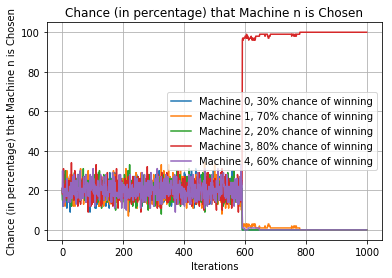

In [5]:
#CODE TO COMPARE AVERAGE FAVORITE MACHINE FOR THE "FIRST EXPLORE, THEN EXPLOIT" STRATEGY



#BEGIN DEFINING VARIABLES
# # #
# #
#

import random; #Stochastic
import math;   #Math
               #Modeling!

    
    
#SETTING UP EXPLORE PARAMETER

random.seed()
expparavg=590 #focusing on our best iteration to switch from exploring to exploiting
numtrial=100   #how many trials per explore parameter
M=5 #number of machines
iterations=1000    #we will have 1000 tries at machines

mach_chance=list()        
 
    
machchose=list()


for p in range(M): #numtrial+1): #setting up so we can keep track of how often a mach is chosen on trial n 

	machchose.append(list()) 
	for n in range(iterations):  
		machchose[p].append(0)   
else:
	#meant to break this loop    
    
   
    

	explore_parameter=expparavg    #from 0.00 to 1.00 

    
    
	#SETTING UP TRIALS    
	trial=list() #keeping track of amount of attempts so we can have a current favorite machine
	for i in range(numtrial):   #from 0 to numtrial-1
		trial.append(0)
            
            
            
	#BEGINNING OF A TRIAL   
	for j in range(numtrial):  
		explore_chance=explore_parameter #explore_parameter chance of exploring
		iterationsleft=iterations    #we want to keep track of how many iterations left    
		expchoice=2        #choosing whether to exploit or explore. Starting at 2, which is not a valid option, so we are sure that either 0 or 1 is actually selected
		machchoice=-1      #choosing which machine to try during exploring. Starting at -1 since there is no mach -1
		favmach=-1         #current favorite machine. Starting at -1 since there is no machine -1.
		wallet=0           #how much money we have made so far
		h=0                #we will start by exploring since we currently have no favorite machine

     
        

		mach_chance.append(0.3) #30% chance of winning if we try machine 0
		mach_chance.append(0.7) #70% chance of winning if we try machine 1
		mach_chance.append(0.2)
		mach_chance.append(0.8)
		mach_chance.append(0.6) #define M machines (M=5 here and this machine is machine M-1)

		mach_pastwins=list() #keeping track of the number of wins for each machine
		for i in range(M):   #from 0 to M-1
			mach_pastwins.append(0)

		mach_attempts=list() #keeping track of amount of attempts so we can have a current favorite machine
		for i in range(M):   #from 0 to M-1
			mach_attempts.append(0)

		mach_winrate=list() #keeping track of our current winrate
		for i in range(M):  #from 0 to M-1
			mach_winrate.append(0)

#
# # 
# # #
# END DEFINING VARIABLES





		#The iterations of a single trial
		while iterationsleft>0:

    #CHOOSING BETWEEN EXPLORING OR EXPLOITING
			if h<0.5: #h<0.5 because h is either 0 or 1, depending on how many iterations have passed
				h2=random.random()            
				machchoice=math.floor(M*h2) #using floor so it goes from 0 to M-1
			else: #h>explore_chance: 
				machchoice=favmach   #simply using our favmach
    
			machchose[machchoice][iterations-iterationsleft]=machchose[machchoice][iterations-iterationsleft]+1 
                   
                
    #PUTTING THE MONEY IN MACHINE MACHCHOICE
				#we have decided to try machchoice
			attempt=random.random() #our shot at winning
			if attempt<mach_chance[machchoice]:
				wallet=wallet+1 # adding $1 to our wallet for winning
				mach_pastwins[machchoice]=mach_pastwins[machchoice] + 1 #adding 1 to our past wins of mach machchoice, the current 
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine
			else:
				mach_attempts[machchoice]=mach_attempts[machchoice] + 1 #adding 1 to our past attempts of mach machchoice, the current machine      
			mach_winrate[machchoice]=mach_pastwins[machchoice]/mach_attempts[machchoice] #updating our winrate for mach machchoice 
    

			#UPDATING FAVMACH
			for N in range(M): #goes from 0 to M-1,
				if mach_winrate[N] > mach_winrate[favmach]:
					favmach=N

    
    #SETTING UP FOR NEXT ITERATION

			iterationsleft=iterationsleft-1 #another iteration complete
            
			if (iterations-iterationsleft)>590:            
				h=1 #switching to exploiting if more than 590 iterations have occured
            
		#We have finished all iterations of this trial        
		trial[j]=wallet #this is our amount made from trial j


print("Test: " + str(machchose[3][900]))

machchoseavg=list() #making the avg of each trial for each machine then graphing!

for p in range(M): #
	machchoseavg.append(list()) 
	for n in range(iterations):  
		machchoseavg[p].append((machchose[p][n]/numtrial)*100)
else:
	#meant to break this loop  
	print("Test: " + str(machchoseavg[3][900]))

    
#The following code was copied from https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html 
#and then modified for our purposes    
    
import numpy as np
import matplotlib.pyplot as plt

m0x = np.arange(0, iterations, 1)
m0y = machchoseavg[0]

m1x = np.arange(0, iterations, 1)
m1y = machchoseavg[1]

m2x = np.arange(0, iterations, 1)
m2y = machchoseavg[2]

m3x = np.arange(0, iterations, 1)
m3y = machchoseavg[3]

m4x = np.arange(0, iterations, 1)
m4y = machchoseavg[4]


fig, ax = plt.subplots()
ax.plot(m0x, m0y, label='Machine 0, 30% chance of winning')
ax.plot(m1x, m1y, label='Machine 1, 70% chance of winning')
ax.plot(m2x, m2y, label='Machine 2, 20% chance of winning')
ax.plot(m3x, m3y, label='Machine 3, 80% chance of winning')
ax.plot(m4x, m4y, label='Machine 4, 60% chance of winning')

ax.set(xlabel='Iterations', ylabel='Chance (in percentage) that Machine n is Chosen',
       title='Chance (in percentage) that Machine n is Chosen')
ax.grid()
ax.legend(loc='center right')
fig.savefig("favoritemachinefixediterationsgraph.png")
plt.show()

### Project Proposal


The Multi-Armed Bandit Problem

Zach Sperling

February 20, 2019

Introduction

In gambling, we often consider someone using a single machine. The machine has a fixed rate at which it outputs a success with a fixed prize and failure with no return otherwise. A person may use this machine until they run out of money or decide they have tried the machine enough times. This does not make for too interesting of a problem to consider since it is simply looking at fixed probabilities.
    
In the multi-armed bandit problem, however, we consider a single gambler with the option of many machines rather than a single one. Each machine has its own chance of success; however, this is hidden from the gambler. If the gambler knew which machine has the highest chance of winning, the gambler would simply continue using this machine indiscriminately. Therefore, a strategy that the gambler could use is to make some attempts at trying new or random machines while also making attempts at what is currently believed to be the machine or top few machines with the highest chance of winning. This produces a much more complicated and interesting problem than a “single-armed bandit.”

We will attempt to develop a strategy in order to produce the greatest profit, considering the method of making some number of attempts at exploring other machines, expressed in percentage of attempts, that may not be better than our currently thought best and making the other attempts at whichever machines we consider the most likely to be the best. If we only made attempts at random machines, or exploring, we would never benefit from our gained knowledge; however, if we only made attempts at whichever machines we believe to be the best ones, or exploiting, we may miss out on a better machine that we have not even considered. Thus, a profitable balance of exploring and exploiting is the strategy we will attempt to achieve. 

Proposed Work

Before attempting to solve a complicated example or apply any kind of strategy to real data, we will first consider a very simple example with a very low number of machines with simple probabilities. For instance, we may consider two machines with probabilities of success of 50% and 10%. We would then be able to easily see the highest profit we could possibly make and then develop strategies that continue to get closer and closer to that highest profit, changing around our exploring and exploitation parameters. 

We will be using Python to create and test these strategies. Once we have developed an optimal strategy for this situation, we will then explore a more complicated example, another for which we know the optimal strategy. We will finally then use real data or a very complicated example to finally put our strategy to good use. To make sure our strategy is indeed working well, we will run the code 100 times for each of the three examples and then take the average value for each trail for each of the three examples. In order to arrive at our optimal split between explore and exploit, we will run our code beginning with an even 50/50 split between explore and exploit, try 25/75 and 75/25, and then move in the “direction” of which “path” produces better profit; that is, if 25/75 is better than 75/25, then perhaps we would try 37.5/62.5 next. We will continue in this fashion for 50 times and then let the final split value be used for the first trial. The same will be done for the other two trials. 

When considered the simple examples, we want to be careful to not be influenced by the known values of the machine payout rates. If we were influenced by these when creating our strategy, then the strategy would not be applicable to unknown data. Therefore, it is important to pretend as if these payout rates are not known to us while creating our methods; we should use them to check that our method works properly.

Sketches of Graphs
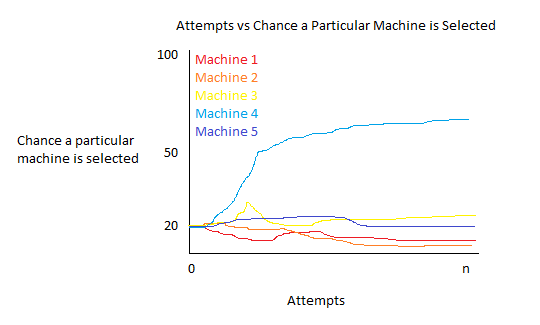 [1]
 
 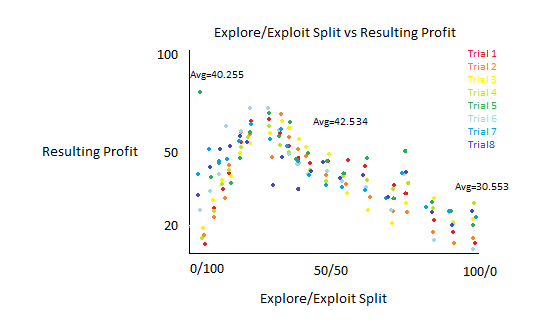
 
 
Note: the first graph is heavily inspired by the graph in [1]




Relevant Resources:
https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c
https://en.wikipedia.org/wiki/Multi-armed_bandit (for basic understanding)
https://support.google.com/analytics/answer/2844870?hl=en
https://books.google.com/books?hl=en&lr=&id=LzSLMHfM3QgC&oi=fnd&pg=PP7&dq=multi+armed+bandit&ots=tbkCbFPRn0&sig=GoRgulcX6gpFBPqZkvcrXpI-Ov4#v=onepage&q=multi%20armed%20bandit&f=false
https://link.springer.com/content/pdf/10.1007%2F11564096_42.pdf


References:
[1] https://towardsdatascience.com/solving-the-multi-armed-bandit-problem-b72de40db97c
